In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
model = Sequential()
model.add(Dense(4096, activation='relu', input_shape=(784,),kernel_regularizer=regularizers.l2(0.00001), name='hidden_1'))
model.add(Dropout(0.2))
model.add(Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.00001), name='hidden_2'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.00001), name='hidden_3'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.00001), name='hidden_4'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax', name='output'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 4096)              3215360   
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 hidden_2 (Dense)            (None, 2048)              8390656   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 hidden_3 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 hidden_4 (Dense)            (None, 512)               5

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(X_train, y_train,
                    batch_size=4096,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_test, y_test))


test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Epoch 1/20
15/15 [==============================] - 125s 8s/step - loss: 1.4386 - accuracy: 0.5071 - val_loss: 0.7465 - val_accuracy: 0.7442
Epoch 2/20
15/15 [==============================] - 117s 8s/step - loss: 0.6661 - accuracy: 0.7790 - val_loss: 0.5740 - val_accuracy: 0.8128
Epoch 3/20
15/15 [==============================] - 110s 7s/step - loss: 0.5308 - accuracy: 0.8302 - val_loss: 0.4965 - val_accuracy: 0.8380
Epoch 4/20
15/15 [==============================] - 115s 8s/step - loss: 0.4628 - accuracy: 0.8551 - val_loss: 0.4596 - val_accuracy: 0.8564
Epoch 5/20
15/15 [==============================] - 110s 7s/step - loss: 0.4231 - accuracy: 0.8685 - val_loss: 0.4463 - val_accuracy: 0.8601
Epoch 6/20
15/15 [==============================] - 115s 8s/step - loss: 0.3991 - accuracy: 0.8755 - val_loss: 0.4289 - val_accuracy: 0.8646
Epoch 7/20
15/15 [==============================] - 109s 7s/step - loss: 0.3788 - accuracy: 0.8821 - val_loss: 0.4040 - val_accuracy: 0.8736
Epoch 8/20
15

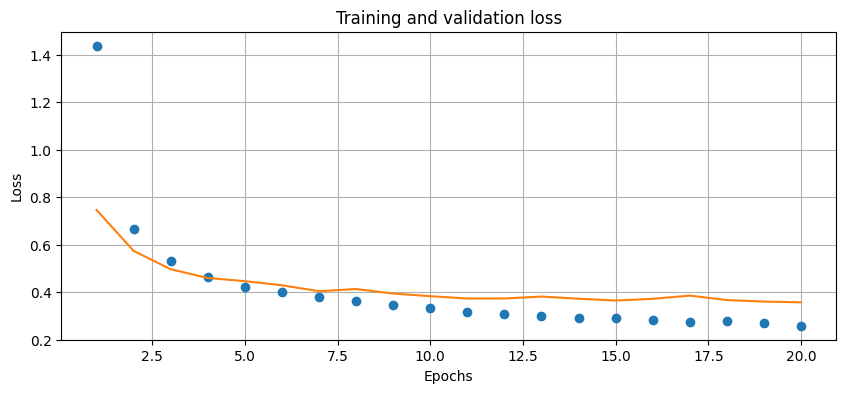

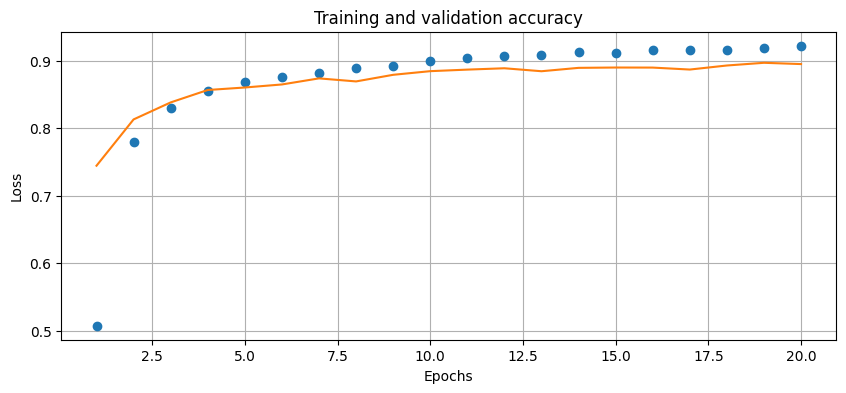

In [6]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.rcParams["figure.figsize"] = (10, 4)
plt.plot(epochs, loss_values, 'o')
plt.plot(epochs, val_loss_values)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()


plt.plot(epochs, history_dict['accuracy'], 'o')
plt.plot(epochs, history_dict['val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()